In [1]:
from data import create_train_val_loader
from options import utils
import yaml
import collections
import argparse
from matplotlib import pyplot as plt
import torch
import pandas as pd
import os
import cv2

/home/jfaath/anaconda3/envs/dlp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import sys
from options.opts import get_eval_arguments

EVAL_DIR = 'results_mobilevittiny_x_small_noscales/remove_3_4_nofuse'
CHKPT_FILE = 'checkpoint_ema_score_60.1800.pt'


sys.argv = ['cvnets', 
            '--common.config-file', f'{EVAL_DIR}/config.yaml',
            '--model.classification.pretrained', f'{EVAL_DIR}/{CHKPT_FILE}']
opts = get_eval_arguments()

# wrong: 4085
predicted:	goose
actual:		albatross, mollymawk


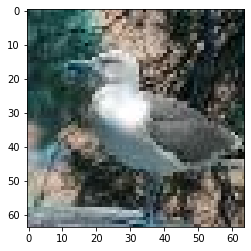

In [8]:
df = pd.read_csv(f'{EVAL_DIR}/{os.path.splitext(CHKPT_FILE)[0]}/eval.csv')
label_df = df.groupby(by='label', as_index=False).first()
label_df['code'] = label_df['image'].apply(lambda x: os.path.normpath(x).split(os.path.sep)[-2])
label_df = label_df.drop(columns=['image', 'pred'])

words_df = pd.read_csv('words.tsv', sep='\t', names=['code', 'entity'], header=None)
label_df = label_df.join(words_df.set_index('code'), on='code', how='inner')

cols = {'entity': 'label_entity', 'code': 'label_code'}
df = df.join(label_df.set_index('label'), on='label', how='inner').rename(columns=cols)
cols = {'entity': 'pred_entity', 'code': 'pred_code'}
df = df.join(label_df.set_index('label'), on='pred', how='inner').rename(columns=cols)

wrong_df = df[df.pred != df.label]
right_df = df[df.pred == df.label]
print(f'# wrong: {len(wrong_df)}')

row = wrong_df.iloc[788]
print(f'predicted:\t{row.pred_entity}')
print(f'actual:\t\t{row.label_entity}')
plt.imshow(cv2.imread(row.image))